<a href="https://colab.research.google.com/github/sorayutmild/ENE461_sorayut/blob/main/ENE461_homework5_Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5: Hough Transform
Description
Write a program for Hough transform for lines or circles.

## นายสรยุทธ มียิ้ม ENE 61070502468

## Table of contents:
* create image
* Hough transform for lines
* Discussion

## Load and Read the images

In [1]:
import numpy as np # for work with multi-dimensional array
import matplotlib.pyplot as plt # for Read and write images
import glob # for weorking with files
import os # for weorking with files
import cv2 # for work with image.

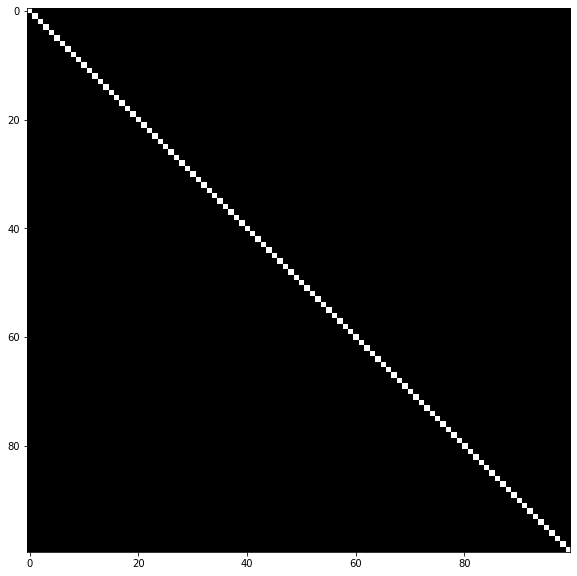

In [2]:
image = np.eye(100)
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.show()

## Hough transform for lines

Using polar coordinate. 

$ x = \rho cos(\theta) $

$ y = \rho sin(\theta) $

therefore, $\rho = xcos(\theta)^2 + ysin(\theta)^2$

we know x, y but $\rho$, $\theta$ are unknown

We define possible $\rho$ to be $\rho_{max} = \sqrt{x^2 + y^2}$
and $\theta$ in polar coordinate is between -90 to 90 degree.

In [4]:
ny = image.shape[0]
nx = image.shape[1]

# rho max
rho_max = int(np.round(np.sqrt(nx**2 + ny ** 2)))

# possible theta from degree to rad.
theta = np.deg2rad(np.arange(-90, 90))

# Hough space
hough_space = np.zeros((2*rho_max, len(theta)))

calculate $\rho$ for each x, y and all possible $\theta$ 

And store it at hough space

In [5]:
for y in range(ny):
    for x in range(nx):
        if image[y,x] > 0:
            for idx, t in enumerate(theta):
                rho = x*np.cos(t) + y*np.sin(t)
                hough_space[int(rho) + rho_max, idx] += 1

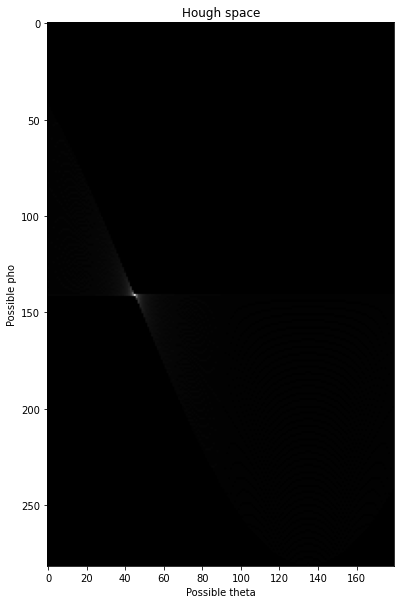

In [6]:
plt.figure(figsize=(50,10))
plt.imshow(hough_space, cmap='gray')
plt.title('Hough space')
plt.xlabel('Possible theta')
plt.ylabel('Possible pho')
plt.show()

ans_pho, ans_theta are $\rho$ and $\theta$ at most intersection point.

ans_x, ans_y are x and y respectively that trasform from ans_pho, ans_theta.

slope $m = \frac{-cos(\theta)}{sin(\theta)}$, y-interception $c = \frac{\rho}{sin(\theta}$

In [7]:
ans_rho, ans_theta = np.where(hough_space == hough_space.max()) # pho, theta
ans_x = ans_rho * np.cos(ans_theta)
ans_y = ans_rho * np.sin(ans_theta)
m = -np.cos(ans_theta) / np.sin(ans_theta)
c = ans_rho / np.sin(ans_theta)

print(f'the answer rho is {ans_rho}')
print(f'the answer theta is {ans_theta}')
print(f'the slope is {m[0]:.2f}')
print(f'the y-interception is {c[0]:.2f}')

the answer rho is [141]
the answer theta is [45]
the slope is -0.62
the y-interception is 165.71


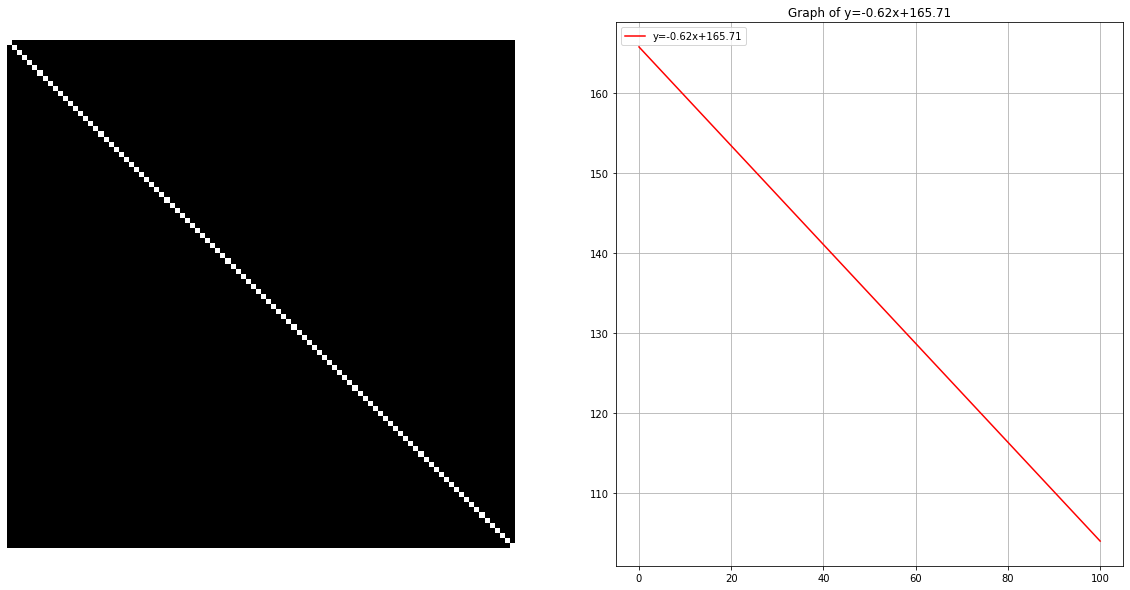

In [10]:
for idx in range(len(ans_x)): 
    x = np.linspace(0, len(image), 100)
    y = m[idx]*x+c[idx]

    plt.figure(figsize=(20,10))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(x, y, '-r', label=f'y={m[0]:.2f}x+{c[0]:.2f}')
    plt.title(f'Graph of y={m[0]:.2f}x+{c[0]:.2f}')
    plt.legend(loc='upper left')
    plt.grid()

    plt.show()

## Discussion

จากการทดลอง ได้ใช้รูปภาพเส้นทะแยงตรง ซึ่งผลลัพธ์ที่ได้จาก Hough transform ได้ผลลัพธ์เป็นไปตามเส้นทะแยงตรง โดยใช้วิธีการทำโดยใช้ polar coordination เนื่องจากตอนแรกลองทำแบบ catesian coordinate แล้วผลลัพธ์ไม่เป็นไปตามที่คาดหวัง อาจจะเกิดจากการประมาณค่า possible slope หรือ possible y-interception ผิด เนื่องจากค่า slope สำหรับเส้นตรงแนวตั้งจะมีค่าเข้าใกล้ $\infty$ 